In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import sqlite3

# Connect to the SQL database that stores all PGA Tour data from 2015-2025 relevant to this project

conn = sqlite3.connect('PGATourData_15_25.db')

df = pd.read_sql_query("SELECT * FROM pgatour_data", conn)

In [34]:
df.head()

,YEAR,PLAYER,ROUNDS,COUNTRY,SG:_TOTAL,BIRDIE_OR_BETTER_PERCENTAGE,BOGEY_AVOIDANCE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,...,ONE_PUTT_PERCENTAGE,3_PUTT_AVOIDANCE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,3_PUTT_AVOIDANCE___INSIDE_5',3_PUTT_AVOIDANCE___5_10',3_PUTT_AVOIDANCE___10_15',3_PUTT_AVOIDANCE___15_20',3_PUTT_AVOIDANCE___20_25',3_PUTT_AVOIDANCE_>_25',AVERAGE_DISTANCE_OF_PUTTS_MADE
0,2015,Aaron Baddeley,66.0,Australia,-0.223,0.2065,0.1637,2.99,4.10,4.57,...,0.4272,0.0225,0.3152,0.0076,0.0046,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,81.0,Canada,0.183,0.2013,0.1571,3.05,4.04,4.68,...,0.3793,0.0269,0.2830,0.0069,0.0039,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,32.0,Australia,0.206,0.2153,0.1725,3.14,4.04,4.58,...,0.3588,0.0486,0.3005,0.0236,0.0000,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,79.0,Germany,-0.217,0.2017,0.1552,3.04,4.03,4.67,...,0.3931,0.0272,0.2897,0.0000,0.0000,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,72.0,United States,-0.004,0.2035,0.1604,3.03,4.06,4.61,...,0.3389,0.0271,0.2790,0.0046,0.0000,0.0000,0.0071,0.0078,0.0904,66.083333


In [35]:
df.tail()

,YEAR,PLAYER,ROUNDS,COUNTRY,SG:_TOTAL,BIRDIE_OR_BETTER_PERCENTAGE,BOGEY_AVOIDANCE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,...,ONE_PUTT_PERCENTAGE,3_PUTT_AVOIDANCE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,3_PUTT_AVOIDANCE___INSIDE_5',3_PUTT_AVOIDANCE___5_10',3_PUTT_AVOIDANCE___10_15',3_PUTT_AVOIDANCE___15_20',3_PUTT_AVOIDANCE___20_25',3_PUTT_AVOIDANCE_>_25',AVERAGE_DISTANCE_OF_PUTTS_MADE
2060,2025,Will Gordon,49.0,United States,-0.604,0.1998,0.1720,3.09,4.06,4.58,...,0.3526,0.0417,0.2819,0.0,0.0062,0.0233,0.0116,0.0267,0.1102,70.083333
2061,2025,William Mouw,50.0,United States,-0.038,0.2231,0.1521,3.04,4.00,4.63,...,0.3880,0.0342,0.3081,0.0,0.0000,0.0163,0.0097,0.0000,0.0952,75.166667
2062,2025,Wyndham Clark,66.0,United States,0.246,0.2354,0.1639,3.07,4.01,4.56,...,0.4201,0.0229,0.3521,0.0,0.0087,0.0058,0.0092,0.0000,0.0717,70.750000
2063,2025,Xander Schauffele,52.0,United States,0.454,0.2248,0.1615,3.09,4.04,4.46,...,0.3802,0.0260,0.3199,0.0,0.0116,0.0074,0.0196,0.0267,0.0773,66.583333
2064,2025,Zac Blair,40.0,United States,-0.083,0.2222,0.1633,3.04,4.03,4.60,...,0.4070,0.0295,0.3276,0.0,0.0325,0.0275,0.0435,0.0172,0.0756,75.500000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   YEAR                                    2065 non-null   int64  
 1   PLAYER                                  2065 non-null   object 
 2   ROUNDS                                  2062 non-null   float64
 3   COUNTRY                                 2062 non-null   object 
 4   SG:_TOTAL                               2062 non-null   float64
 5   BIRDIE_OR_BETTER_PERCENTAGE             2062 non-null   float64
 6   BOGEY_AVOIDANCE                         2062 non-null   float64
 7   PAR_3_SCORING_AVERAGE                   2062 non-null   float64
 8   PAR_4_SCORING_AVERAGE                   2062 non-null   float64
 9   PAR_5_SCORING_AVERAGE                   2062 non-null   float64
 10  SG:_OFF_THE_TEE                         2062 non-null   floa

In [37]:
df.YEAR.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [38]:
# there is 1 null value in 'APPROACHES_FROM_>_275_YARDS' and 3 year, player combinations that don't have any stats

# drop these rows

df.dropna(inplace=True)

In [39]:
df.describe()

,YEAR,ROUNDS,SG:_TOTAL,BIRDIE_OR_BETTER_PERCENTAGE,BOGEY_AVOIDANCE,PAR_3_SCORING_AVERAGE,PAR_4_SCORING_AVERAGE,PAR_5_SCORING_AVERAGE,SG:_OFF_THE_TEE,DRIVING_DISTANCE,...,ONE_PUTT_PERCENTAGE,3_PUTT_AVOIDANCE,BIRDIE_OR_BETTER_CONVERSION_PERCENTAGE,3_PUTT_AVOIDANCE___INSIDE_5',3_PUTT_AVOIDANCE___5_10',3_PUTT_AVOIDANCE___10_15',3_PUTT_AVOIDANCE___15_20',3_PUTT_AVOIDANCE___20_25',3_PUTT_AVOIDANCE_>_25',AVERAGE_DISTANCE_OF_PUTTS_MADE
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,2019.970845,61.844023,0.138360,0.211444,0.161061,3.054820,4.029363,4.634286,0.034338,296.807240,...,0.393110,0.028751,0.303671,0.001358,0.004189,0.007798,0.013605,0.021814,0.092677,73.037739
std,3.127361,14.520449,0.707619,0.018200,0.018289,0.045361,0.039289,0.071824,0.368082,9.472545,...,0.022198,0.006627,0.023715,0.002709,0.004954,0.007796,0.011929,0.016475,0.023415,3.967086
min,2015.000000,20.000000,-3.454000,0.134300,0.094400,2.920000,3.880000,4.410000,-1.717000,269.200000,...,0.310700,0.009700,0.197400,0.000000,0.000000,0.000000,0.000000,0.000000,0.029000,58.666667
25%,2017.000000,51.000000,-0.259000,0.199500,0.148800,3.030000,4.000000,4.590000,-0.169500,290.300000,...,0.378500,0.024000,0.287600,0.000000,0.000000,0.000000,0.006000,0.010300,0.075900,70.333333
50%,2020.000000,62.500000,0.146000,0.210600,0.159700,3.050000,4.030000,4.640000,0.048000,296.800000,...,0.393400,0.028300,0.302850,0.000000,0.003700,0.006300,0.011600,0.019600,0.090350,73.000000
75%,2023.000000,72.000000,0.558000,0.222200,0.171800,3.080000,4.050000,4.680000,0.268750,303.200000,...,0.407800,0.033000,0.318375,0.002600,0.006800,0.011900,0.020400,0.031600,0.106775,75.750000
max,2025.000000,113.000000,2.743000,0.279300,0.270500,3.350000,4.250000,4.930000,1.230000,326.300000,...,0.476900,0.054900,0.389300,0.023600,0.033800,0.066700,0.076900,0.121200,0.186400,89.250000


In [40]:
# standardize column names by converting to lowercase, removing colons and spaces

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace(':', '')

In [41]:
df.year = df.year.astype(str)

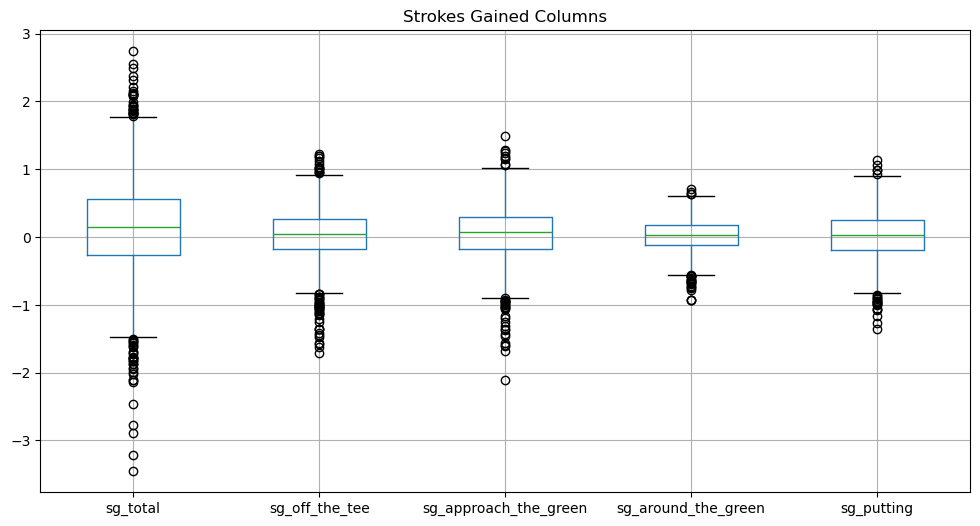

In [42]:
sg_cols = [col for col in df.columns if col.startswith('sg')]

df[sg_cols].boxplot(figsize=(12,6))
plt.title("Strokes Gained Columns")
plt.show()

We can see above that there are significant positive and negative outliers in 'strokes gained: total' but we do not want to eliminate this as we want to generalize to all golfers on the Tour.

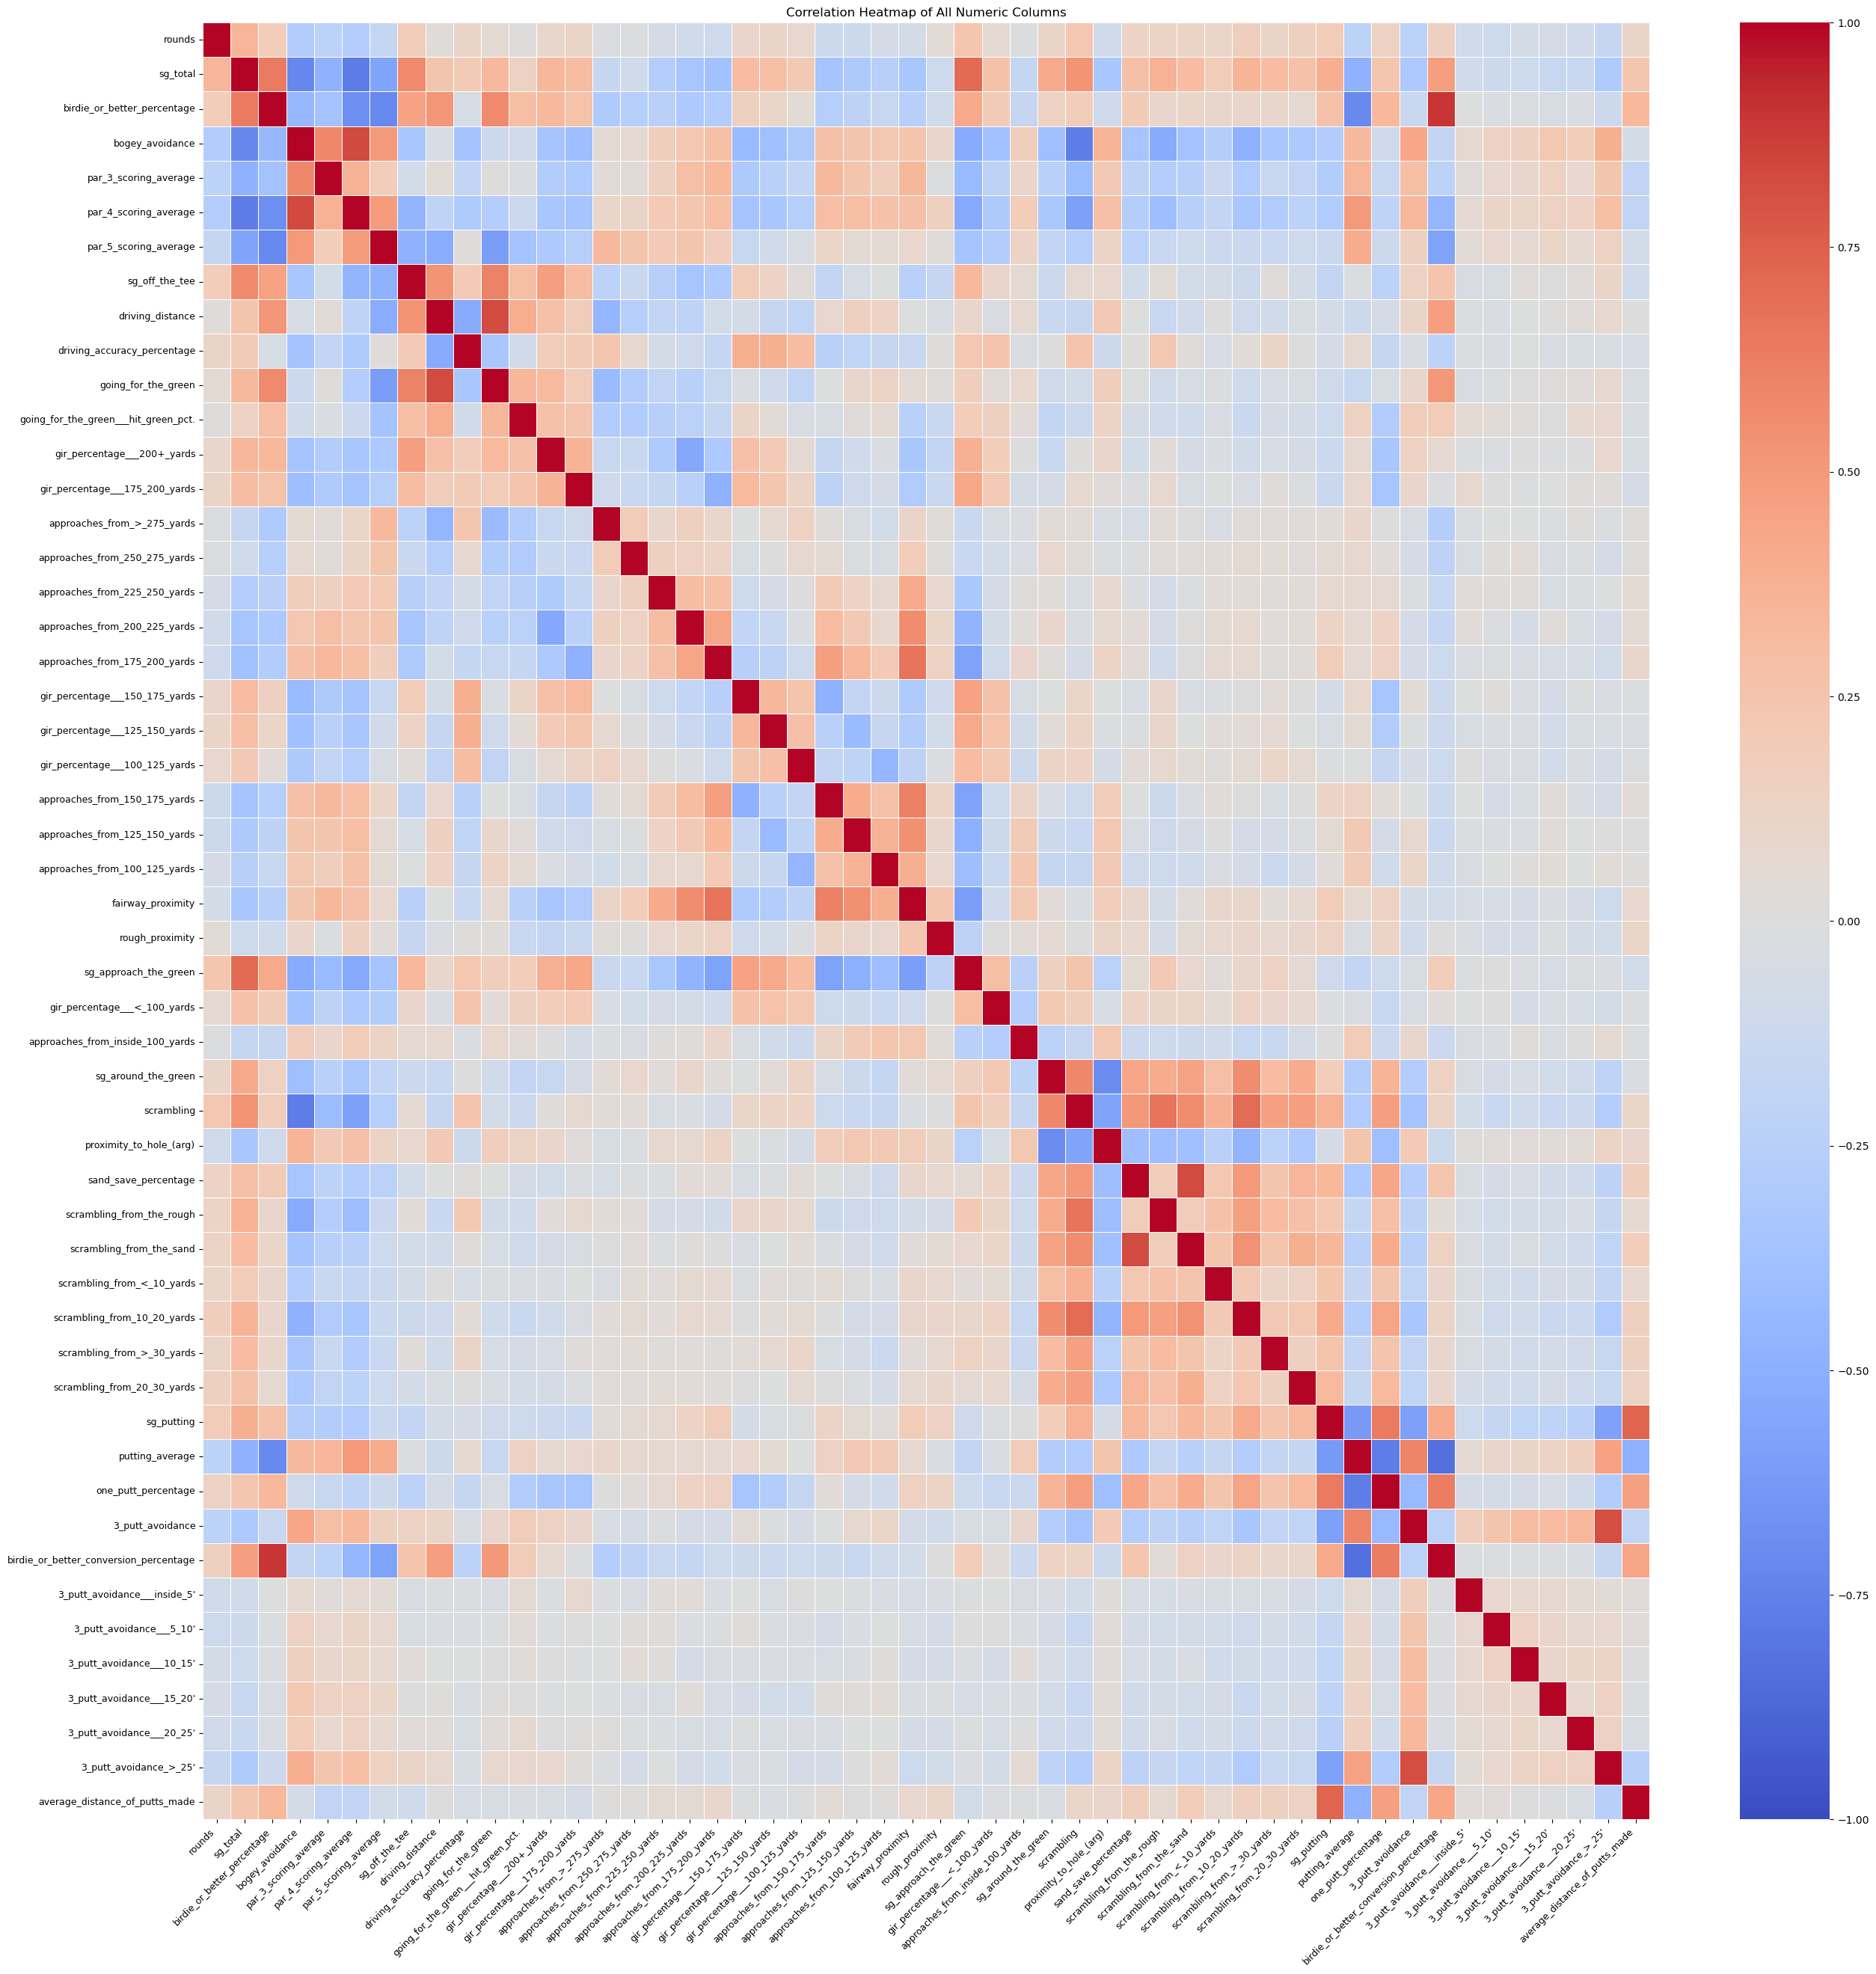

In [43]:
corr = df.corr(numeric_only=True)

n = len(corr.columns)
plt.figure(figsize=(max(10, n * 0.6), max(8, n * 0.6)))

ax = sns.heatmap(
    corr,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    annot=False
)

ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticks(np.arange(len(corr.index)) + 0.5)
ax.set_yticklabels(corr.index, rotation=0, fontsize=9)

plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

In [44]:
rename_map = {}

for col in corr.columns:
    if col.startswith("scrambling"):
        rename_map[col] = col.replace("scrambling", "SCR")
    elif col.startswith("approaches"):
        rename_map[col] = col.replace("approaches", "APR")
    elif col.startswith("gir_percentage"):
        rename_map[col] = col.replace("gir_percentage", "GIR_%")


corr = corr.rename(columns=rename_map, index=rename_map)


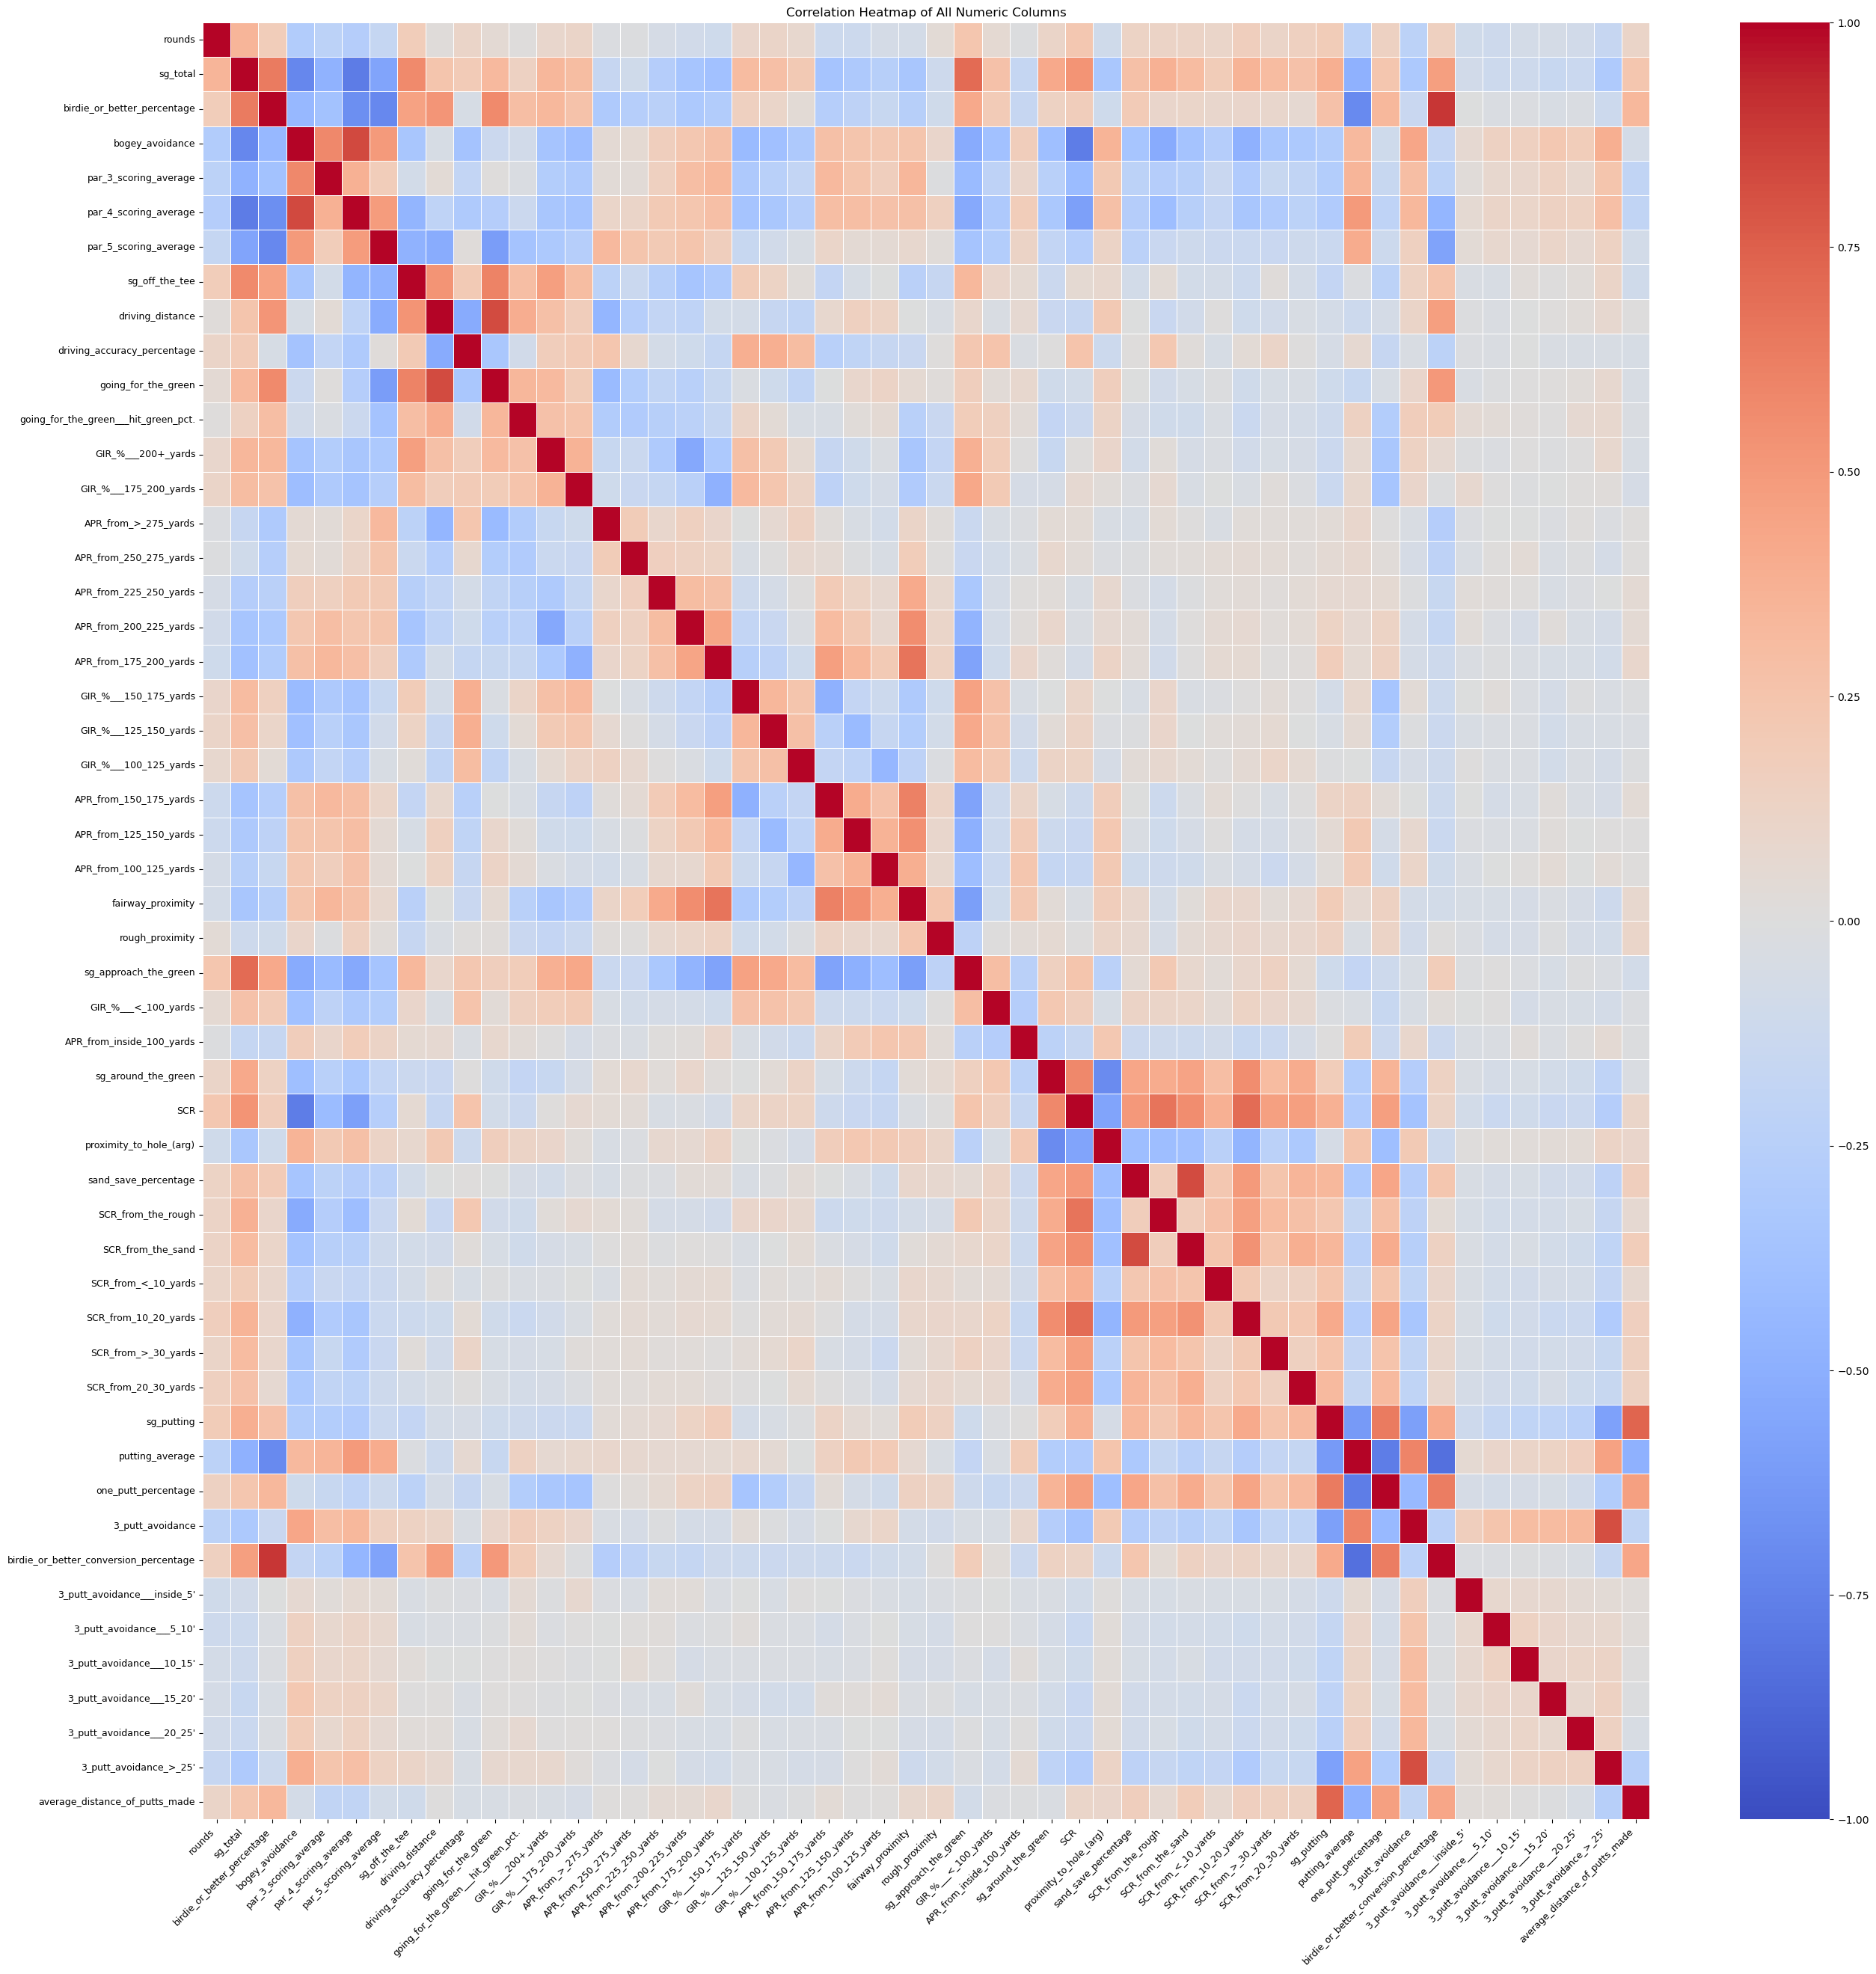

In [45]:
n = len(corr.columns)
plt.figure(figsize=(max(10, n * 0.6), max(8, n * 0.6)))

ax = sns.heatmap(
    corr,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    annot=False
)

ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticks(np.arange(len(corr.index)) + 0.5)
ax.set_yticklabels(corr.index, rotation=0, fontsize=9)

plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

We see some highly correlated features, let's use scatter plots to visualize correlation and determine whether we want to remove them

In [46]:
corr.head()

,rounds,sg_total,birdie_or_better_percentage,bogey_avoidance,par_3_scoring_average,par_4_scoring_average,par_5_scoring_average,sg_off_the_tee,driving_distance,driving_accuracy_percentage,...,one_putt_percentage,3_putt_avoidance,birdie_or_better_conversion_percentage,3_putt_avoidance___inside_5',3_putt_avoidance___5_10',3_putt_avoidance___10_15',3_putt_avoidance___15_20',3_putt_avoidance___20_25',3_putt_avoidance_>_25',average_distance_of_putts_made
rounds,1.000000,0.348027,0.185464,-0.282551,-0.225735,-0.265941,-0.165929,0.185813,0.017110,0.112001,...,0.144148,-0.221684,0.149116,-0.096209,-0.110196,-0.077743,-0.066741,-0.092053,-0.157852,0.115949
sg_total,0.348027,1.000000,0.636097,-0.719005,-0.481616,-0.776793,-0.565552,0.572802,0.243147,0.201475,...,0.237202,-0.317597,0.468883,-0.086285,-0.119098,-0.112299,-0.150631,-0.137410,-0.298586,0.241979
birdie_or_better_percentage,0.185464,0.636097,1.000000,-0.440135,-0.371739,-0.680155,-0.715865,0.455631,0.522779,-0.047648,...,0.332055,-0.145445,0.892147,-0.006594,-0.023467,-0.016560,-0.045184,-0.028545,-0.124618,0.331593
bogey_avoidance,-0.282551,-0.719005,-0.440135,1.000000,0.584365,0.834091,0.493653,-0.339567,-0.050740,-0.366001,...,-0.107923,0.433491,-0.175758,0.069573,0.146299,0.148750,0.222959,0.181144,0.386601,-0.073386
par_3_scoring_average,-0.225735,-0.481616,-0.371739,0.584365,1.000000,0.368034,0.187038,-0.081794,0.042562,-0.185405,...,-0.153988,0.293948,-0.219832,0.026204,0.085300,0.091897,0.133911,0.082684,0.247231,-0.192966


In [47]:
corr = corr.copy()

# remove diagonal + lower triangle
mask = np.tril(np.ones_like(corr, dtype=bool))
corr_ut = corr.mask(mask)

threshold = 0.75

corr_high = corr_ut.where(np.abs(corr_ut) >= threshold)

In [48]:
high_corr_pairs = (
    corr_ut
    .stack()
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "r"})
    .query("abs(r) >= 0.75")
    .sort_values("r", key=lambda x: x.abs(), ascending=False)
)

high_corr_pairs.feature_1.unique()

array(['birdie_or_better_percentage', 'bogey_avoidance',
       'putting_average', 'driving_distance', 'sand_save_percentage',
       '3_putt_avoidance', 'sg_total'], dtype=object)

In [49]:
high_corr_pairs.feature_2.unique()

array(['birdie_or_better_conversion_percentage', 'par_4_scoring_average',
       'going_for_the_green', 'SCR_from_the_sand',
       "3_putt_avoidance_>_25'", 'SCR', 'one_putt_percentage'],
      dtype=object)

In [50]:
high_corr_pairs

,feature_1,feature_2,r
142,birdie_or_better_percentage,birdie_or_better_conversion_percentage,0.892147
151,bogey_avoidance,par_4_scoring_average,0.834091
1273,putting_average,birdie_or_better_conversion_percentage,-0.834046
381,driving_distance,going_for_the_green,0.824892
1156,sand_save_percentage,SCR_from_the_sand,0.822710
1296,3_putt_avoidance,3_putt_avoidance_>_25',0.820034
54,sg_total,par_4_scoring_average,-0.776793
177,bogey_avoidance,SCR,-0.772625
1271,putting_average,one_putt_percentage,-0.766116


In [51]:
df.drop(columns=['3_putt_avoidance', 'birdie_or_better_percentage', 'bogey_avoidance', 'sand_save_percentage'], inplace=True)
corr.drop(columns=['3_putt_avoidance', 'birdie_or_better_percentage', 'bogey_avoidance', 'sand_save_percentage'], inplace=True)

In [52]:
# remove diagonal + lower triangle
mask = np.tril(np.ones_like(corr, dtype=bool))
corr_ut = corr.mask(mask)

threshold = 0.75

corr_high = corr_ut.where(np.abs(corr_ut) >= threshold)

In [53]:
high_corr_pairs = (
    corr_ut
    .stack()
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "r"})
    .query("abs(r) >= 0.75")
    .sort_values("r", key=lambda x: x.abs(), ascending=False)
)

high_corr_pairs.feature_1.unique()

array(['birdie_or_better_percentage', '3_putt_avoidance', 'sg_total',
       'bogey_avoidance'], dtype=object)

In [54]:
high_corr_pairs.feature_2.unique()

array(['birdie_or_better_conversion_percentage', "3_putt_avoidance_>_25'",
       'par_4_scoring_average', 'SCR'], dtype=object)

In [55]:
high_corr_pairs

,feature_1,feature_2,r
130,birdie_or_better_percentage,birdie_or_better_conversion_percentage,0.892147
1120,3_putt_avoidance,3_putt_avoidance_>_25',0.820034
48,sg_total,par_4_scoring_average,-0.776793
163,bogey_avoidance,SCR,-0.772625


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2064
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    2058 non-null   object 
 1   player                                  2058 non-null   object 
 2   rounds                                  2058 non-null   float64
 3   country                                 2058 non-null   object 
 4   sg_total                                2058 non-null   float64
 5   par_3_scoring_average                   2058 non-null   float64
 6   par_4_scoring_average                   2058 non-null   float64
 7   par_5_scoring_average                   2058 non-null   float64
 8   sg_off_the_tee                          2058 non-null   float64
 9   driving_distance                        2058 non-null   float64
 10  driving_accuracy_percentage             2058 non-null   float64
 

In [57]:
approach_dists = [col for col in df.columns if 'approaches' in col]
girs = [col for col in df.columns if 'gir_percentage' in col]
scrambling = [col for col in df.columns if 'scrambling' in col]
# putting = [col for col in df.columns if 'putt' in col and 'putting_average' not in col]
putting = [col for col in df.columns if 'putt' in col and 'sg' not in col]
sgs = [col for col in df.columns if col.startswith('sg')]

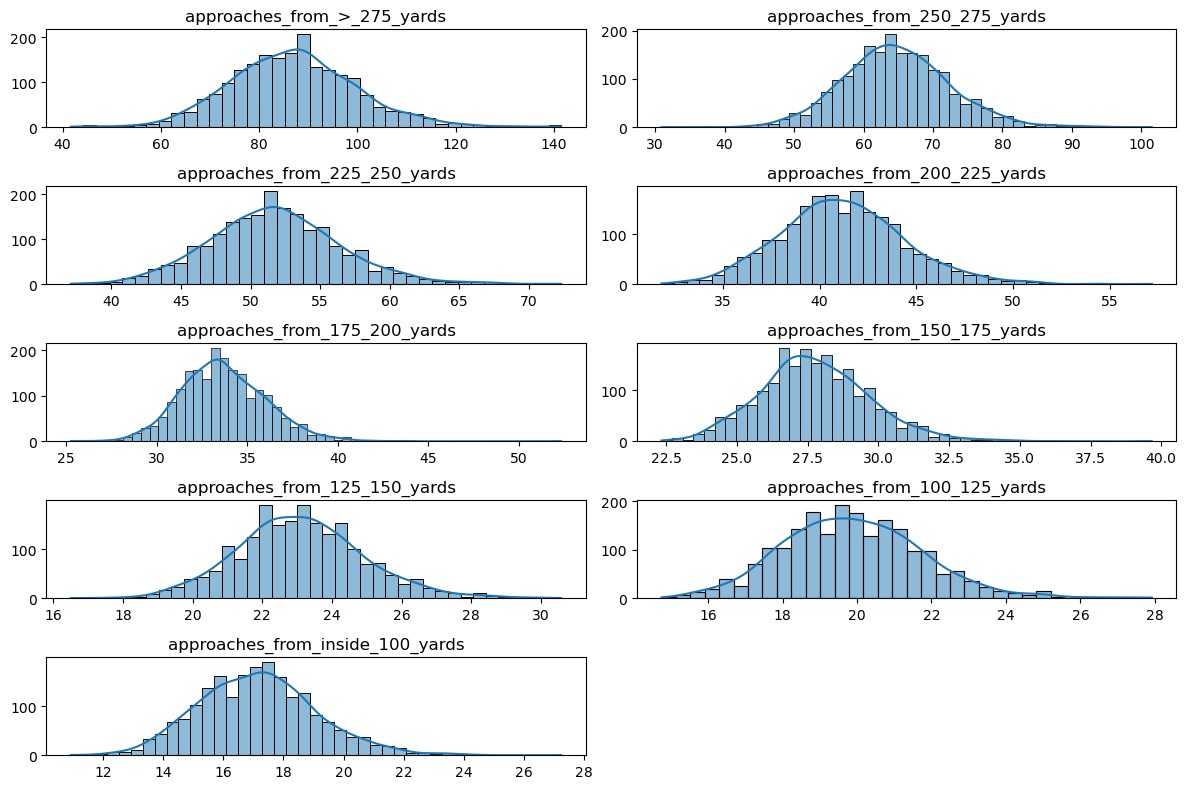

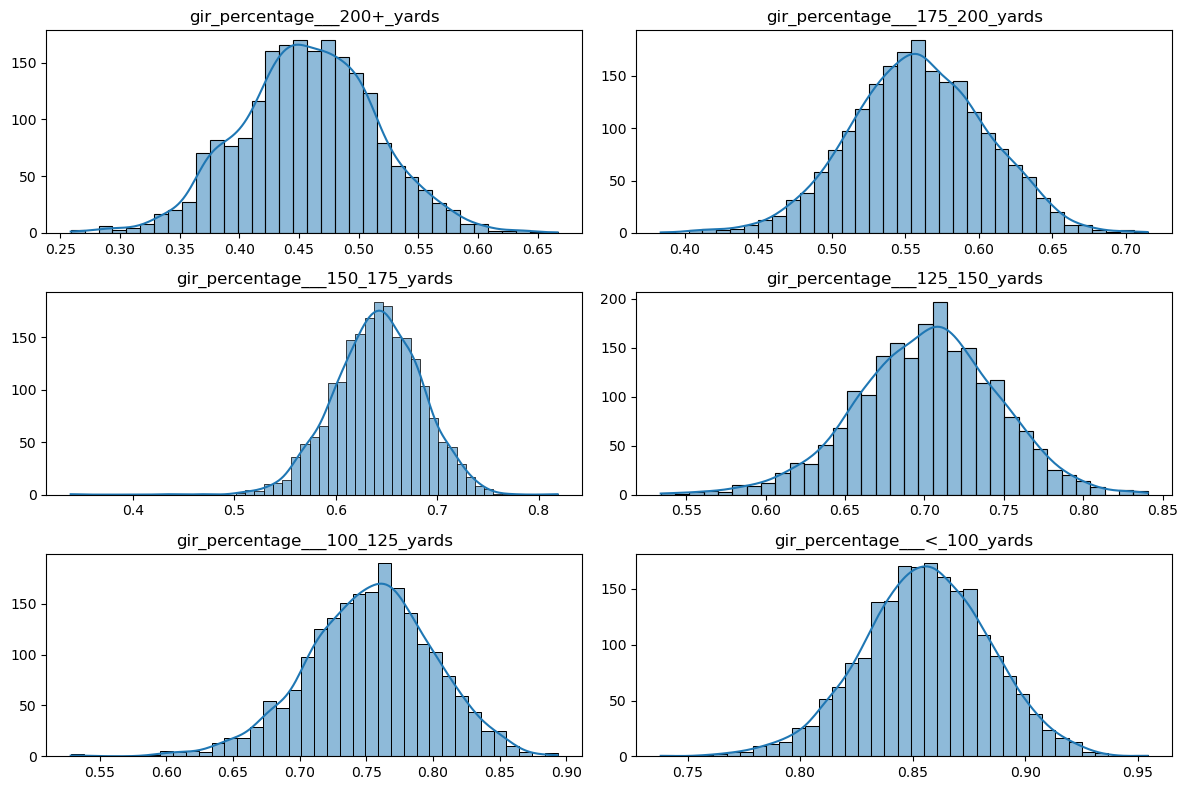

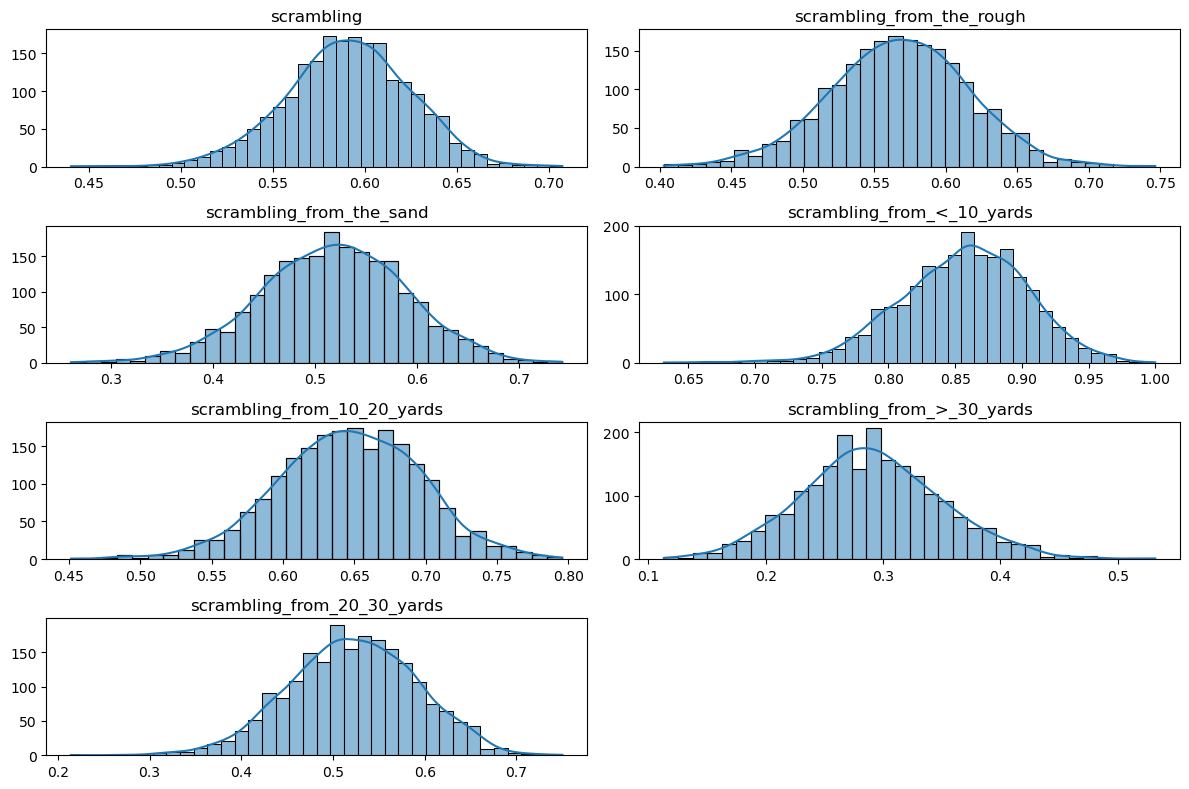

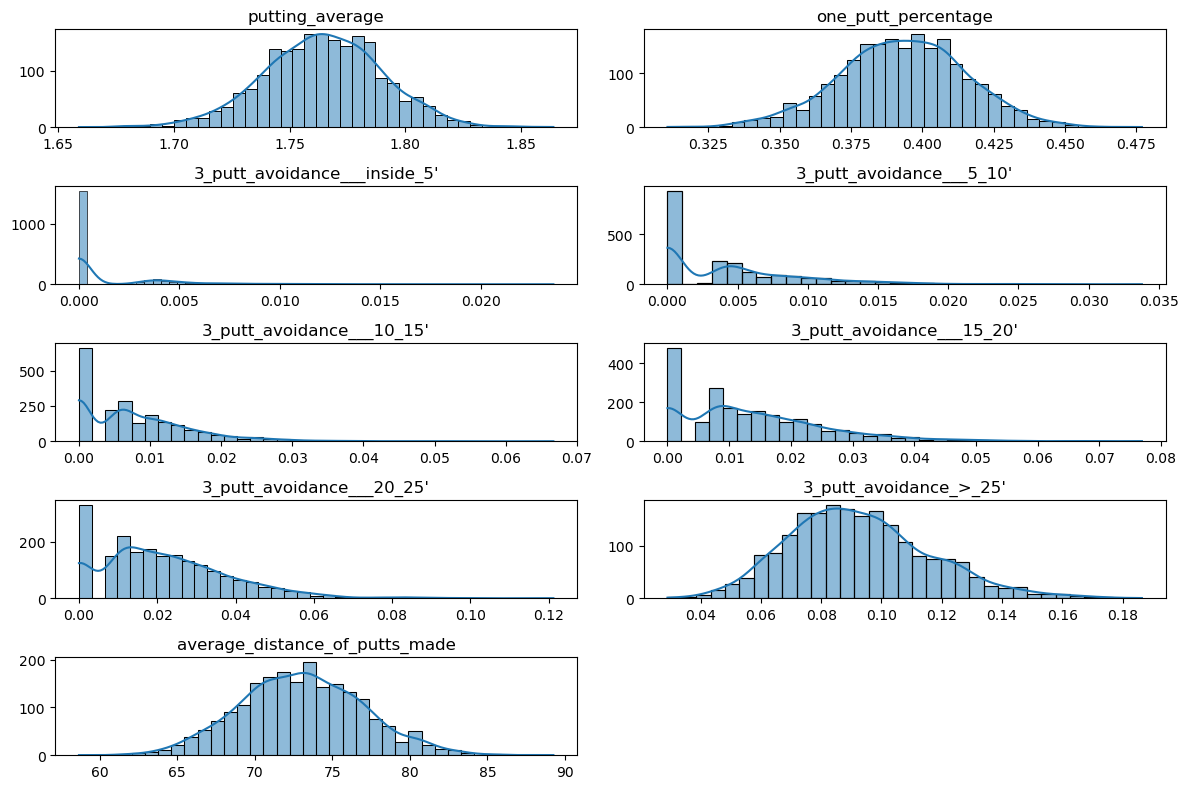

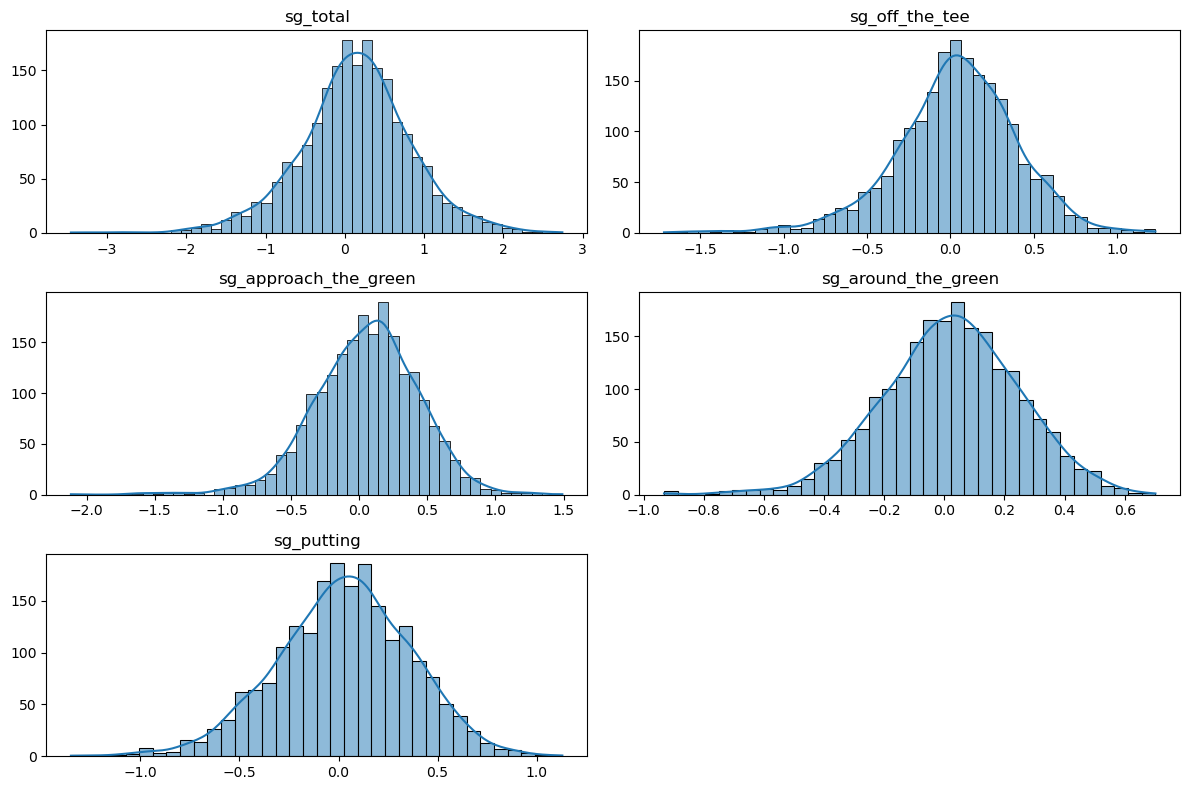

['year', 'player', 'rounds', 'country', 'par_3_scoring_average', 'par_4_scoring_average', 'par_5_scoring_average', 'driving_distance', 'driving_accuracy_percentage', 'going_for_the_green', 'going_for_the_green___hit_green_pct.', 'fairway_proximity', 'rough_proximity', 'proximity_to_hole_(arg)', 'birdie_or_better_conversion_percentage']


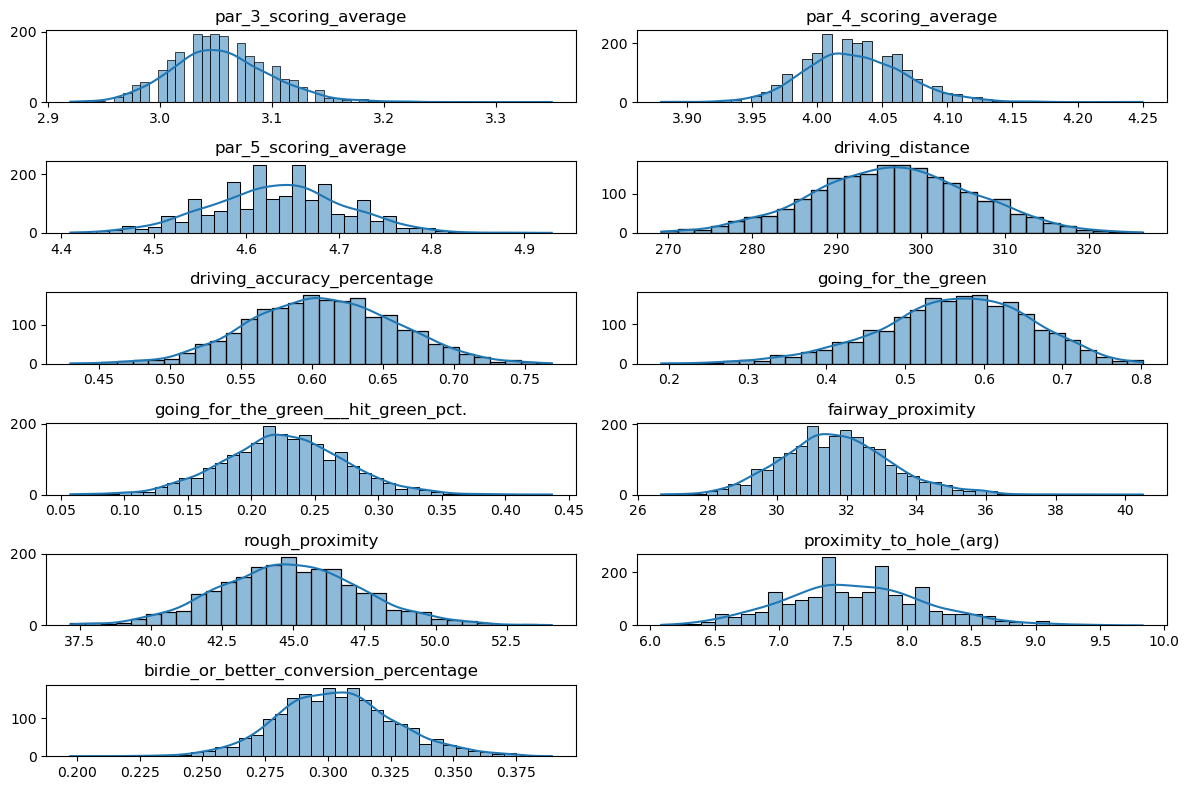

In [58]:
def hists(input_cols):
    n = len(input_cols)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(input_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

hists(approach_dists)
hists(girs)
hists(scrambling)
hists(putting)
hists(sgs)

misc_cols = [col for col in df.columns if col not in approach_dists + girs + scrambling + putting + sgs]

print(misc_cols)

misc_cols.remove('year')
misc_cols.remove('player')
misc_cols.remove('rounds')
misc_cols.remove('country')

hists(misc_cols)

In [59]:
df.drop(columns=['3_putt_avoidance___inside_5\'', '3_putt_avoidance___5_10\''], inplace=True)
putting.remove('3_putt_avoidance___inside_5\'')
putting.remove('3_putt_avoidance___5_10\'')

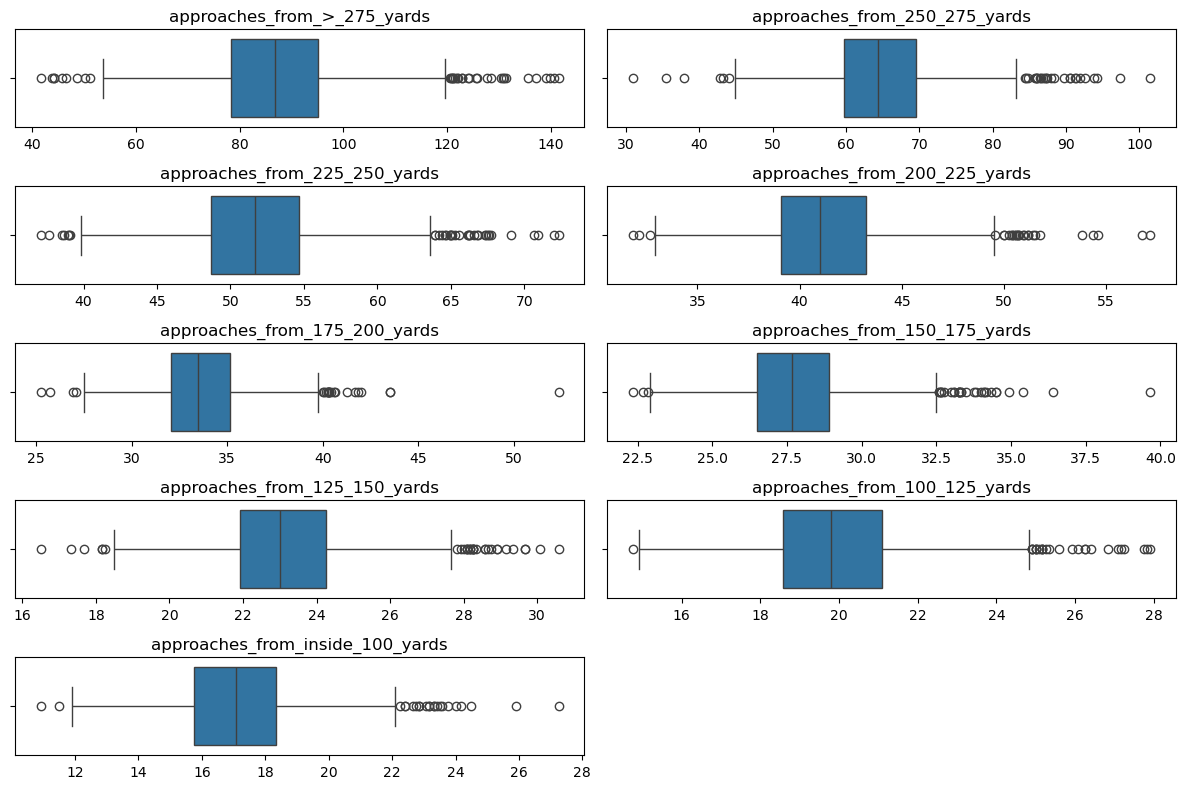

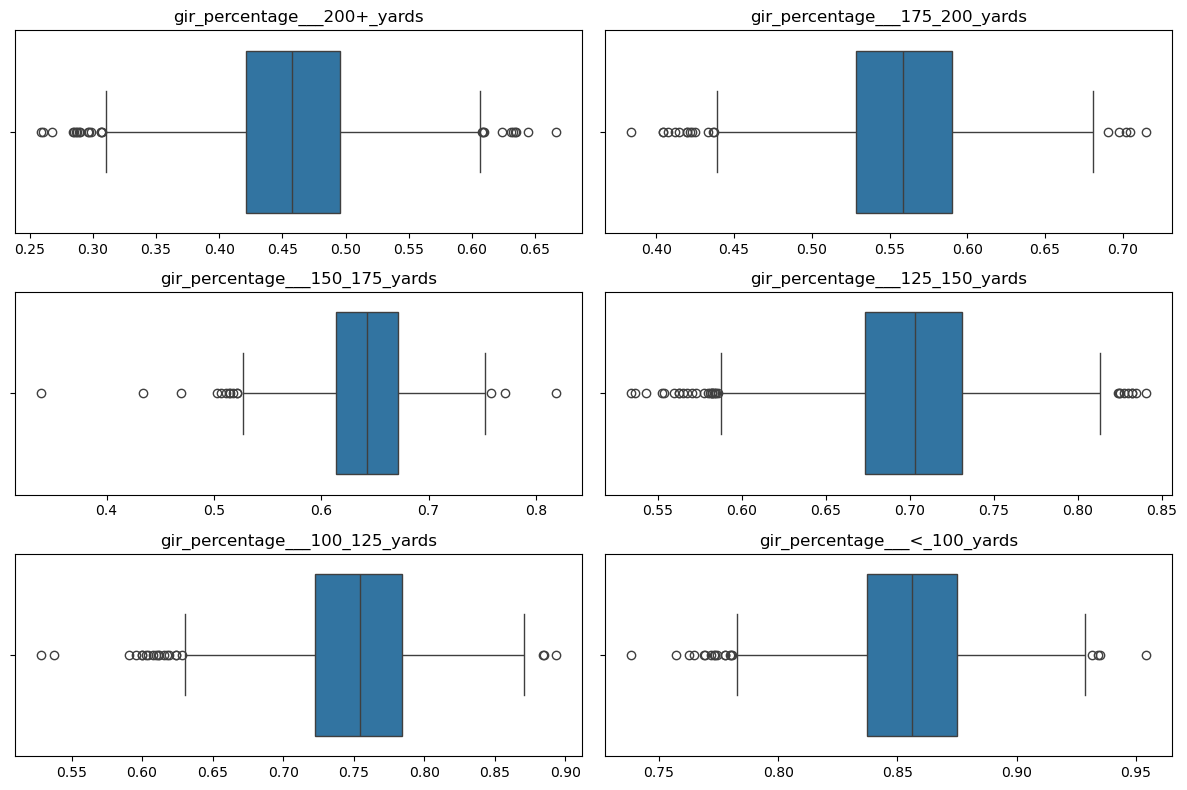

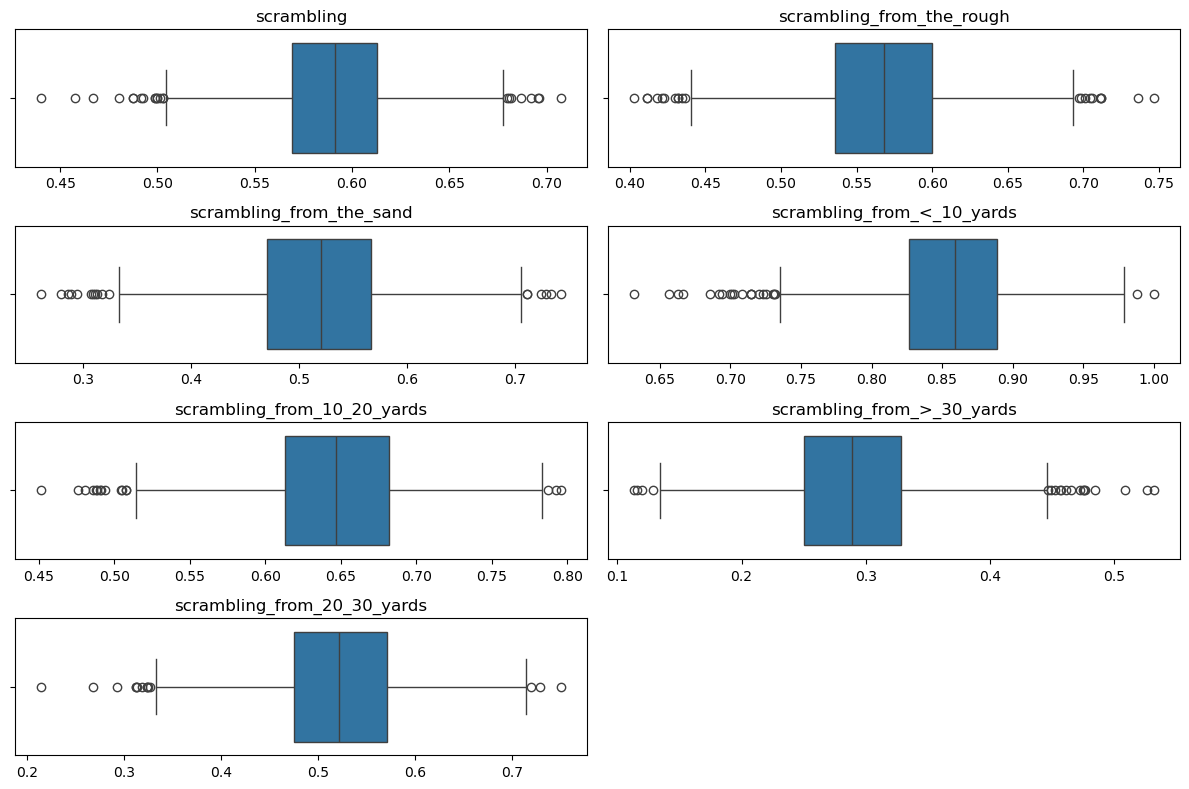

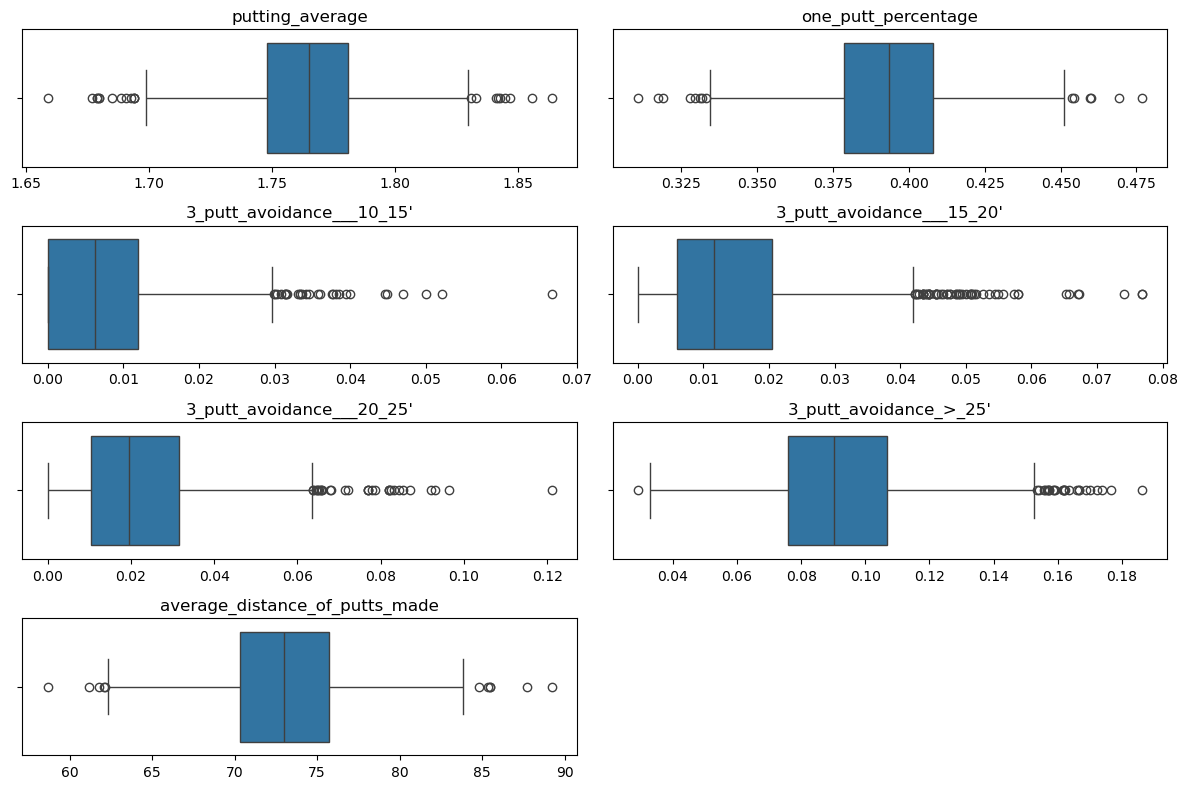

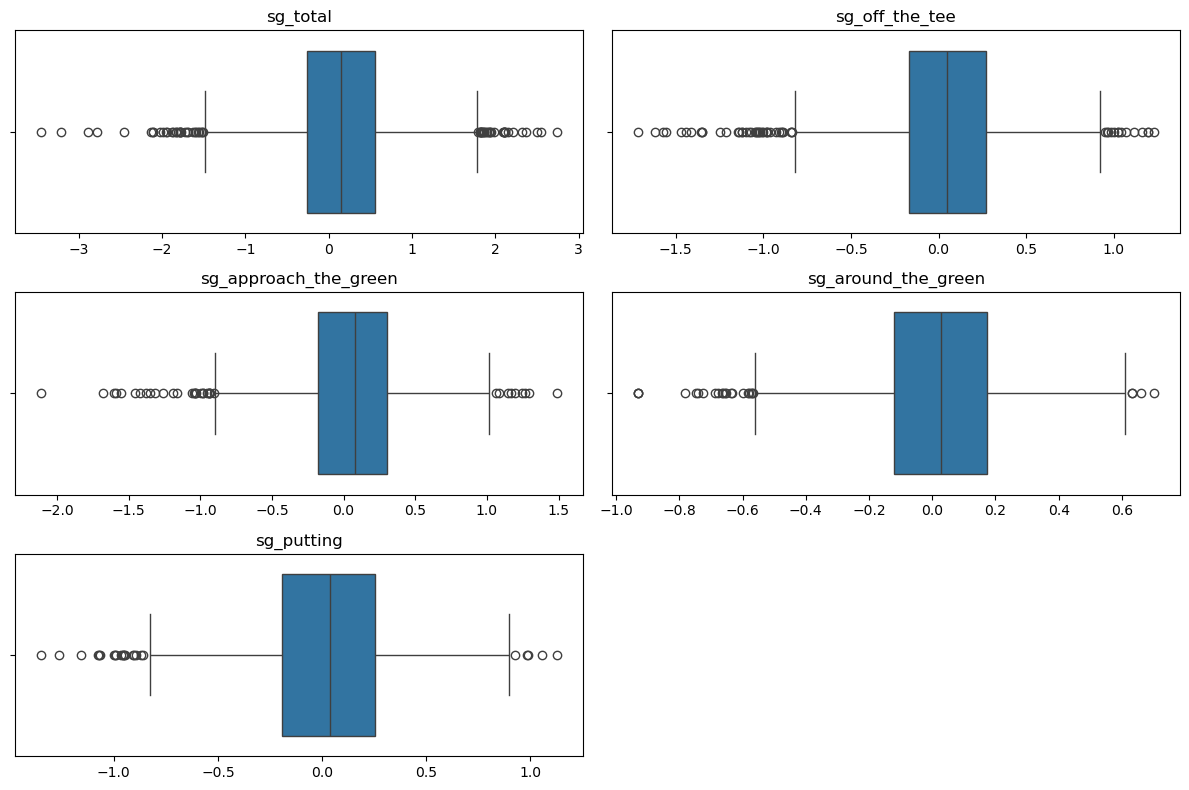

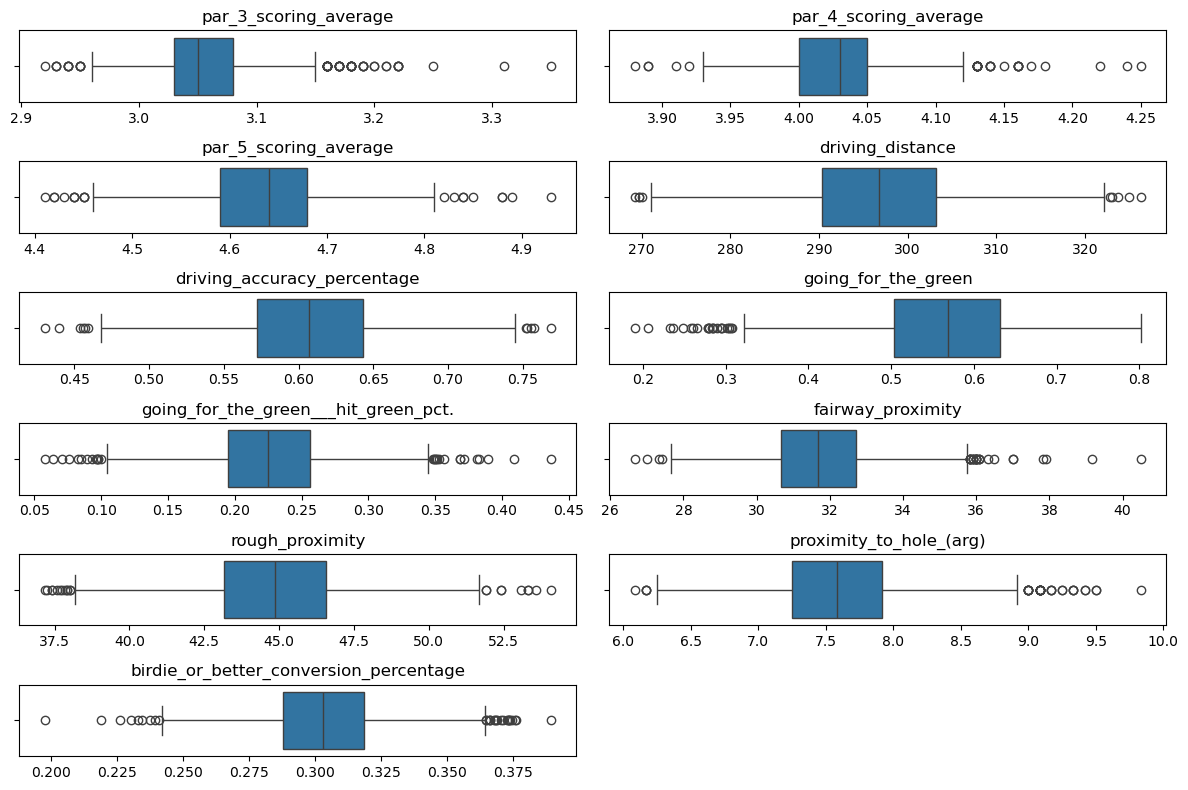

In [60]:
def boxes(input_cols):
    n = len(input_cols)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(input_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Remove any empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxes(approach_dists)
boxes(girs)
boxes(scrambling)
boxes(putting)
boxes(sgs)
boxes(misc_cols)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2064
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   year                                    2058 non-null   object 
 1   player                                  2058 non-null   object 
 2   rounds                                  2058 non-null   float64
 3   country                                 2058 non-null   object 
 4   sg_total                                2058 non-null   float64
 5   par_3_scoring_average                   2058 non-null   float64
 6   par_4_scoring_average                   2058 non-null   float64
 7   par_5_scoring_average                   2058 non-null   float64
 8   sg_off_the_tee                          2058 non-null   float64
 9   driving_distance                        2058 non-null   float64
 10  driving_accuracy_percentage             2058 non-null   float64
 

In [62]:
df.to_csv('cleaned_pgatour_data.csv', index=False)